In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Check all the physical devices**

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## **Checking if we can run on 'GPU'**

In [3]:
tf.test.is_built_with_cuda()

True

## **Load the CIFAR10 Dataset from keras**

In [18]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(f"Shape of Training dataset : {x_train.shape}")
print(f"Shape of Test Dataset : {x_test.shape}")

Shape of Training dataset : (50000, 32, 32, 3)
Shape of Test Dataset : (10000, 32, 32, 3)


In [29]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

## Quickly verify

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


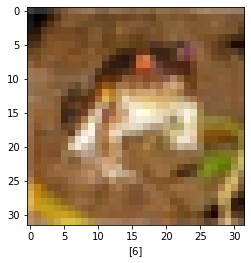

In [19]:
plt.imshow(x_train[0])
plt.xlabel(y_train[0])
plt.show()

## **Normalize the Dataset**

In [20]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

### **Convert the Labels into Categorical Dataset (One-Hot-Encoded)**

In [21]:
y_train_categorical = tf.keras.utils.to_categorical(
    y=y_train,num_classes=10
)
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
y_test_categorical = tf.keras.utils.to_categorical(
    y_test,num_classes=10
)
y_test_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

## **Model Building**

In [25]:
# Building up simple neural network with single layer neuron

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_scaled,y_train_categorical,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9608 - accuracy: 0.3158
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8822 - accuracy: 0.3515
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8532 - accuracy: 0.3614
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8357 - accuracy: 0.3692
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8371 - accuracy: 0.3725
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8313 - accuracy: 0.3769
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8277 - accuracy: 0.3794
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8024 - accuracy: 0.3823
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8007 - accuracy: 0.3841
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.805

In [24]:
# Adding up the hidden layers 

model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model1.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model1.fit(x_train_scaled,y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 9s 4ms/step - loss: 1.8154 - accuracy: 0.3532
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6240 - accuracy: 0.4263
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5401 - accuracy: 0.4564
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4797 - accuracy: 0.4763
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4317 - accuracy: 0.4965
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3865 - accuracy: 0.5124
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3524 - accuracy: 0.5261
Epoch 8/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3160 - accuracy: 0.5379
Epoch 9/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2826 - accuracy: 0.5505
Epoch 10/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.253

## **Accuracy of the Built model.**

In [26]:
model1.evaluate(x_test_scaled,y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.6693 - accuracy: 0.5478


[1.669283390045166, 0.5478000044822693]

## **Try to Predict some classes**

In [40]:
classes[np.argmax(model1.predict(x_test_scaled)[3])]

'airplane'

In [41]:
classes[y_test[3][0]]

'airplane'

In [42]:
def get_models():
  model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
  ])

  model1.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

  return model1

In [43]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
  cpu_model = get_models()
  cpu_model.fit(x_train_scaled,y_train_categorical,epochs=1)

1563/1563 [==============================] - 100s 63ms/step - loss: 1.8147 - accuracy: 0.3529
1 loop, best of 1: 1min 40s per loop


In [44]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
  cpu_model = get_models()
  cpu_model.fit(x_train_scaled,y_train_categorical,epochs=1)

1563/1563 [==============================] - 7s 4ms/step - loss: 1.8085 - accuracy: 0.3567
1 loop, best of 1: 12.1 s per loop


In [47]:
# So the Difference is quite clear here, For running 1 epoch CPU took 1 min 40 sec and when we ran it using GPU it ran in 12.1 sec only, so it is almost 8 times faster than CPU